In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("ticketmaster.csv")

In [8]:
df["Date"] = pd.to_datetime(df["Date"])
df["Weekday"] = df["Date"].dt.day_name()

In [13]:
df["Min"]

0       39.0
1       54.0
2       76.0
3       37.0
4       60.0
        ... 
1003     NaN
1004     NaN
1005     NaN
1006     NaN
1007     NaN
Name: Min, Length: 1008, dtype: float64

In [16]:
df.groupby(by=["Weekday"])["Min"].mean()

Weekday
Friday       78.004393
Monday       46.025581
Saturday     71.718732
Sunday       64.494912
Thursday     61.686267
Tuesday      70.006250
Wednesday    72.192895
Name: Min, dtype: float64

In [17]:
df.groupby(by=["Weekday"])["Max"].mean()

Weekday
Friday       633.583832
Monday       755.769767
Saturday     476.098662
Sunday       751.155351
Thursday     729.766933
Tuesday      798.742361
Wednesday    634.177632
Name: Max, dtype: float64

In [25]:
len(df["Category"].unique())

15

In [19]:
bball = df[df["Category"] == "Basketball"]

In [21]:
bball.groupby(by=["Weekday"])["Max"].mean()

Weekday
Friday       1813.441176
Monday       2795.785714
Saturday     2813.166667
Sunday       3272.800000
Thursday     3847.500000
Tuesday      2561.944444
Wednesday    2153.777778
Name: Max, dtype: float64

In [22]:
bball.groupby(by=["Weekday"])["Min"].mean()

Weekday
Friday       60.852941
Monday       33.285714
Saturday     54.333333
Sunday       75.233333
Thursday     64.000000
Tuesday      74.166667
Wednesday    53.111111
Name: Min, dtype: float64

In [ ]:
bball.groupby(by=["Weekday"])["Min"].mean()

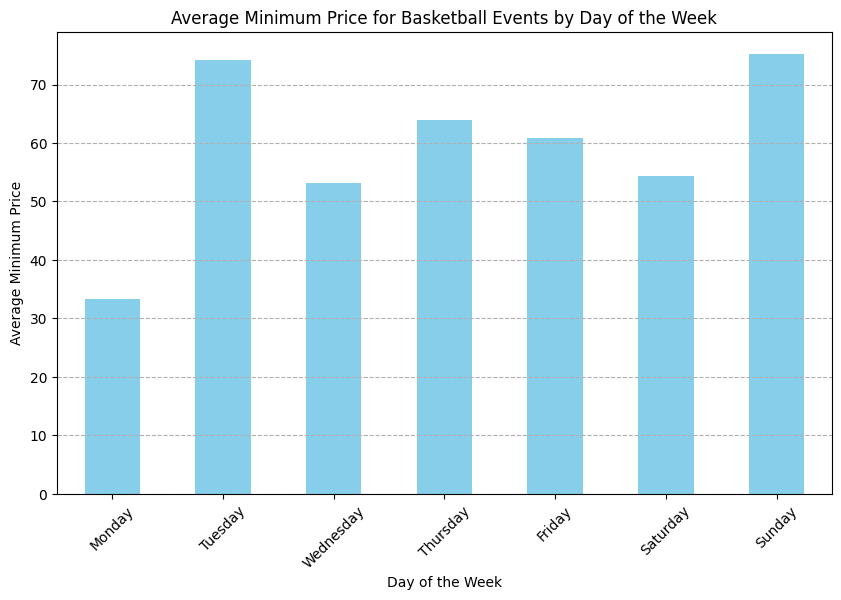

In [36]:
# Step 3: Plot the results
plt.figure(figsize=(10, 6))
average_min_price_by_day = bball.groupby('Weekday')['Min'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
average_min_price_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Minimum Price for Basketball Events by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Minimum Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()


In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data1 is your DataFrame containing the results grouped by city
# You may need to adjust the column names accordingly

# Step 1: Filter data for baseball events
baseball_events = df[df['Category'] == 'Basketball']  # Adjust if necessary

# Step 2: Find the top 5 cities by average minimum price
top_5_cities = baseball_events.groupby('City')['Min'].mean().nlargest(5).index

# Step 3: Filter data for the top 5 cities
baseball_events_top_5 = baseball_events[baseball_events['City'].isin(top_5_cities)]

# Step 4: Convert 'Day' to categorical for proper ordering, and calculate average 'AvgMin' price
baseball_events_top_5['Day'] = pd.Categorical(baseball_events_top_5['Day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
average_min_price_by_day_city = baseball_events_top_5.groupby(['Day', 'City'])['Min'].mean().unstack()

# Step 5: Plot the results
plt.figure(figsize=(12, 6))
average_min_price_by_day_city.plot(kind='bar', ax=plt.gca())
plt.title('Average Minimum Price for Baseball Events by Day of the Week (Top 5 Cities)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Minimum Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend(title='City', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

KeyError: 'Day'

In [23]:
rock = df[df["Category"] == "Rock"]

In [24]:
rock.groupby(by=["Weekday"])["Min"].mean()

Weekday
Friday       119.621429
Monday        78.712500
Saturday     106.755556
Sunday        54.750000
Thursday      60.475000
Tuesday       61.975000
Wednesday     54.401667
Name: Min, dtype: float64